In [1]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import csv
from skimage import color
import scipy.misc

from deep.datasets import imageutl as imutl
from deep.datasets import utility as utl
from deep import visualization as view
from deep.datasets import syntheticdata as dsynt
from deep.datasets import dsxbtransform as dsxbtrans

In [8]:
pathdataset = '../db/real'
data = dsynt.SyntheticColorCheckerDataset(
        pathdataset, 
        transform=transforms.Compose([
            #dsxbtrans.ElasticDistort(size_grid=50, deform=15),                       
            #dsxbtrans.RandomCrop( cropsize=(192,192) ),
            #dsxbtrans.ColorDistort(),
            #dsxbtrans.ShiftScale(prob=1.0, limit=4), 
            dsxbtrans.GeometricDistort(angle=0, translation=0.05, warp=0.01),            
            #dsxbtrans.RandomFlip(prob=0.75),
            dsxbtrans.UnetResize(imsize=512),                     
            dsxbtrans.ToTensor(),
            #dsxbtrans.ElasticTorchDistort(size_grid=10, deform=0.05),
            dsxbtrans.Normalize(),  
            ])
        )

dataloader = DataLoader(data, batch_size=3, shuffle=True, num_workers=1 )
print('Total images: ', len( dataloader ) )


Total images:  34


0 torch.Size([3, 3, 700, 700]) torch.Size([3, 2, 700, 700]) torch.Size([3, 1, 700, 700])
0.0 1.0 torch.Size([700, 700])
0.0 1.0 torch.Size([700, 700])
0.0 6.5567474365234375 torch.Size([700, 700])
torch.Size([3, 700, 700])
[ 0.  1.]


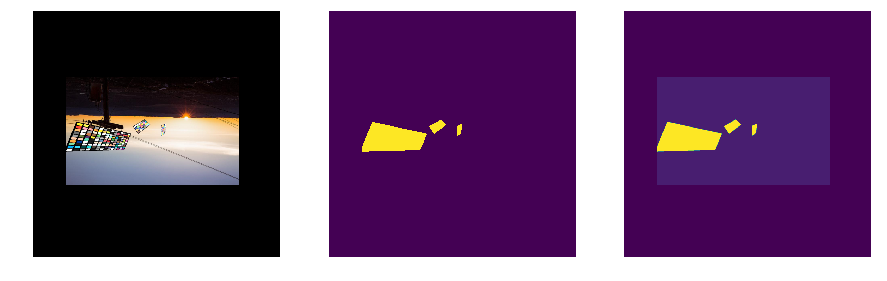

1 torch.Size([3, 3, 700, 700]) torch.Size([3, 2, 700, 700]) torch.Size([3, 1, 700, 700])
0.0 1.0 torch.Size([700, 700])
0.0 1.0 torch.Size([700, 700])
0.0 6.817151069641113 torch.Size([700, 700])
torch.Size([3, 700, 700])
[ 0.  1.]


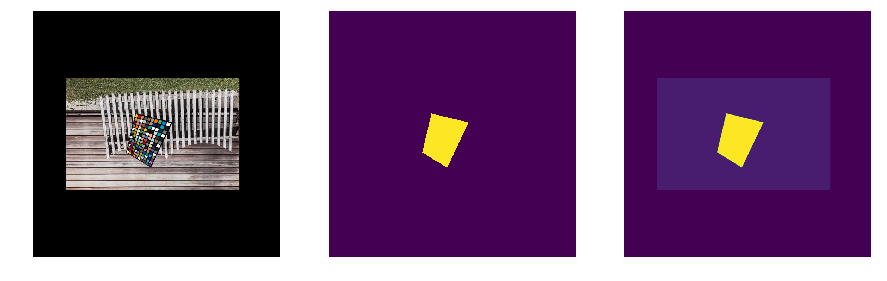

2 torch.Size([3, 3, 700, 700]) torch.Size([3, 2, 700, 700]) torch.Size([3, 1, 700, 700])
0.0 1.0 torch.Size([700, 700])
0.0 1.0 torch.Size([700, 700])
0.0 14.078020095825195 torch.Size([700, 700])
torch.Size([3, 700, 700])
[ 0.  1.]


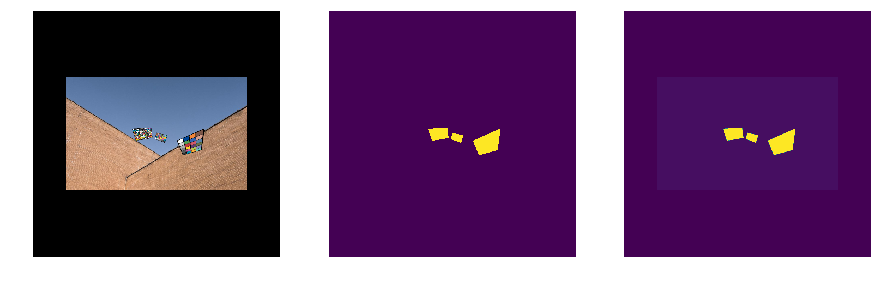

3 torch.Size([3, 3, 700, 700]) torch.Size([3, 2, 700, 700]) torch.Size([3, 1, 700, 700])
0.0 1.0 torch.Size([700, 700])
0.0 1.0 torch.Size([700, 700])
0.0 10.229131698608398 torch.Size([700, 700])
torch.Size([3, 700, 700])
[ 0.  1.]


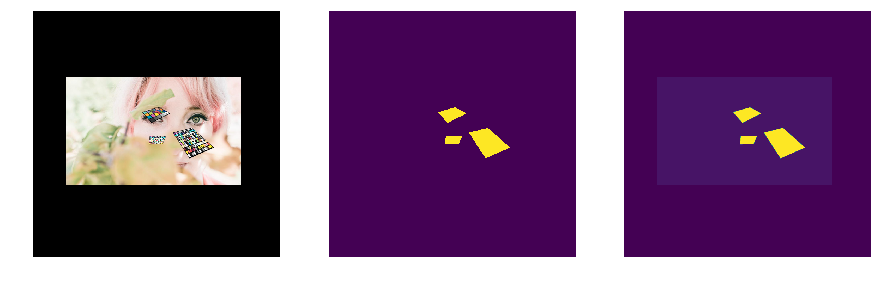

In [6]:


label_batched = []
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size(),
          sample_batched['weight'].size()    
         )
    
    image_a = sample_batched['image'][0,:,...]
    image_b = sample_batched['image'][1,:,...]
    image_c = sample_batched['image'][2,:,...]

    image = sample_batched['image'][0,0,...]
    label = sample_batched['label'][0,1,...]
    weight = sample_batched['weight'][0,0,...]
    
    print(torch.min(image), torch.max(image), image.shape )
    print(torch.min(label), torch.max(label), image.shape )
    print(torch.min(weight), torch.max(weight), image.shape )

    print(image_a.shape)
    print( np.unique(label) )
        
    plt.figure( figsize=(15,15) )
    plt.subplot(131)
    plt.imshow( image_a.permute(1,2,0).squeeze() ) #, cmap='gray' 
    plt.axis('off')
    plt.ioff()

    plt.subplot(132)
    #plt.imshow( image_b.permute(1,2,0).squeeze() ) 
    plt.imshow( label ) #cmap='gray'
    plt.axis('off')
    plt.ioff()

    plt.subplot(133)
    #plt.imshow( image_c.permute(1,2,0).squeeze()  ) 
    plt.imshow( weight )
    plt.axis('off')

    plt.ioff()       
    plt.show()        

    # observe 4th batch and stop.
    if i_batch == 3: 
        break        


